## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = len(mouse_study_results["Mouse ID"].value_counts())
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study_results.loc[mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = mouse_study_results.loc[mouse_study_results["Mouse ID"] == "g989"]
duplicate_mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
clean_df = mouse_study_results.loc[mouse_study_results["Mouse ID"] != "g989"]
clean_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleandf_mice = len(clean_df["Mouse ID"].value_counts())
cleandf_mice

248

In [7]:
clean_df.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = clean_df.groupby("Drug Regimen")
tumor_mean = drug_group["Tumor Volume (mm3)"].mean() 
tumor_median = drug_group["Tumor Volume (mm3)"].median() 
tumor_variance = drug_group["Tumor Volume (mm3)"].var()
tumor_std = drug_group["Tumor Volume (mm3)"].std()
tumor_SEM = drug_group["Tumor Volume (mm3)"].sem() 
sumstats = pd.DataFrame({"Mean": tumor_mean, 
                         "Median": tumor_median,
                        "Variance": tumor_variance, 
                        "Standard Deviation": tumor_std, 
                        "SEM": tumor_SEM})
sumstats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_group2 = clean_df.copy()
drug_group2 = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_group2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts 

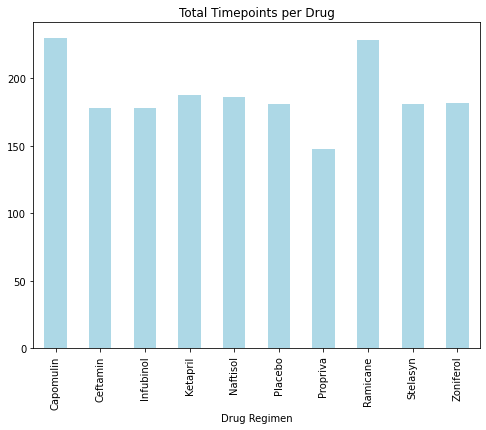

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
reduced_data = clean_df[["Mouse ID", 
          "Drug Regimen",
         "Timepoint"]]
drug_timepoints = reduced_data.groupby(["Drug Regimen"])["Timepoint"].count()
drug_timepoints.plot(kind="bar", figsize=(8,6), facecolor="lightblue", title="Total Timepoints per Drug")

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

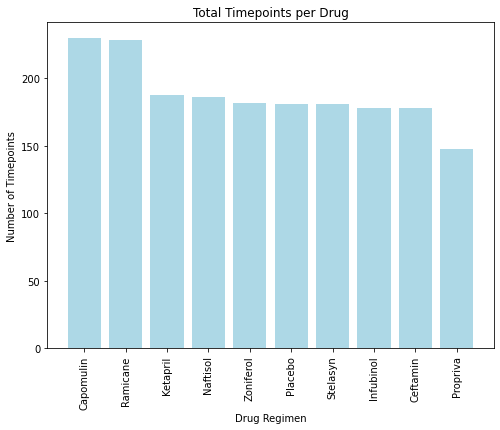

In [12]:
x_axis = clean_df["Drug Regimen"].value_counts().index
timepoints = clean_df["Drug Regimen"].value_counts() # This will be the numbers used for y-axis
y_axis = timepoints
plt.figure(figsize=(8,6))
plt.bar(x_axis, y_axis, color="lightblue")
plt.title("Total Timepoints per Drug")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_grouping = clean_df.copy()
gender_grouping = clean_df.groupby(["Sex"])["Sex"].count()
gender_grouping
colors = ["pink", "lightblue"]

In [14]:
gender_grouping

Sex
Female    922
Male      958
Name: Sex, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000236E0EE61D0>],
      dtype=object)

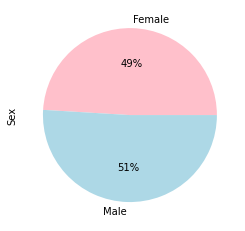

In [15]:
gender_grouping.plot(kind="pie", subplots=True, autopct='%1.0f%%', colors=colors)

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_grouping2 = clean_df.copy()
gender_grouping2 = clean_df.groupby(["Sex"]).nunique()
number_per_gender = gender_grouping2[["Mouse ID"]]
number_per_gender

,Mouse ID
Sex,
Female,123
Male,125


In [17]:
labels = ["Female", "Male"]
numbers = [123, 125]
colors = ["pink", "lightblue"]

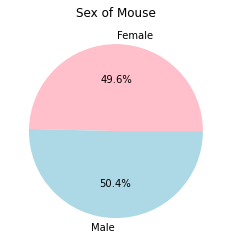

In [18]:
plt.pie(numbers, explode=None, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Sex of Mouse")
plt.show()

In [19]:
sex = ["Female", "Male"]
colors = ["pink", "lightblue"]

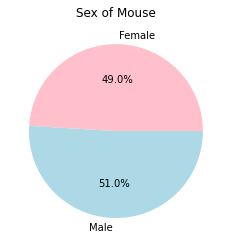

In [20]:
plt.pie(gender_grouping, labels = sex, colors=colors, autopct="%1.1f%%")
plt.title("Sex of Mouse")
plt.show()

In [21]:
#Shown above are 2 different ways to chart a pie graph with PyPlot. The first way displays more hardcoding than the second way.

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
group_mouseID = clean_df.copy()
group_mouseID = clean_df.groupby("Mouse ID")
last_timepoint = group_mouseID['Timepoint'].max()
mouse_tp_max = pd.DataFrame({"Timepoint": last_timepoint})
combined_mice_study = pd.merge(clean_df, mouse_tp_max, how="inner", on=["Mouse ID", "Timepoint"])
combined_mice_study
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [44]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for drug in drug_regimen:
    final_tumor_vol = combined_mice_study.loc[combined_mice_study["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
print(tumor_vol_data)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
[1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
180    46.539206
Name: Tumor Volume (mm3), dtype: float64, 0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.81036

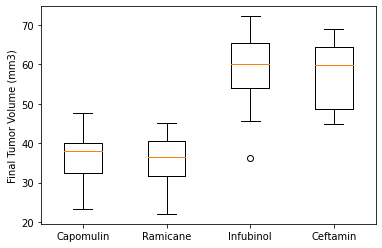

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels=drug_regimen)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin",:]
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [26]:
# "b128","Capomulin","Female",9,22
mouse_b128 = Capomulin.loc[Capomulin["Mouse ID"] == "b128"]
mouse_b128

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


Text(0, 0.5, 'Volume of Tumor')

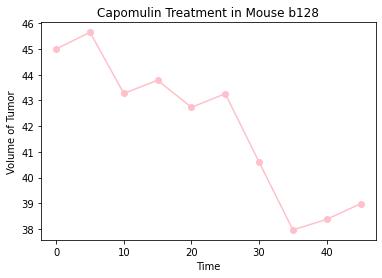

In [27]:
mouseb128_x = mouse_b128["Timepoint"]
mouseb128_y = mouse_b128["Tumor Volume (mm3)"]
plt.plot(mouseb128_x, mouseb128_y, marker="o", color='pink')
plt.title("Capomulin Treatment in Mouse b128")
plt.xlabel("Time")
plt.ylabel("Volume of Tumor")

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [29]:
grouped_Capomulin = Capomulin.groupby("Mouse ID")
avg_tumor_Capomulin = grouped_Capomulin["Tumor Volume (mm3)"].mean()
avg_tumor_Capomulin
weights_Capomulin = grouped_Capomulin["Weight (g)"].mean()
weights_Capomulin

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

Text(0, 0.5, 'Weight of Mouse')

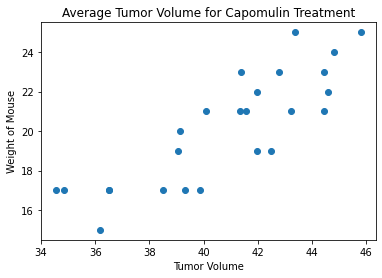

In [37]:
plt.scatter(avg_tumor_Capomulin, weights_Capomulin)
plt.title("Average Tumor Volume for Capomulin Treatment")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight of Mouse")

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values=weights_Capomulin
y_values=avg_tumor_Capomulin

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [35]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.95x +21.55


The r-value is: 0.7088568047708717


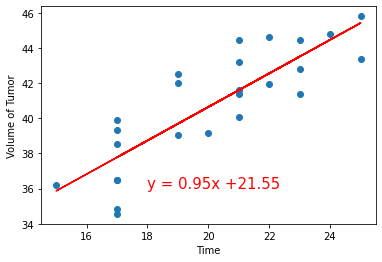

In [36]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Time')
plt.ylabel('Volume of Tumor')
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()